In [ ]:
!pip install -q "tensorflow_text==2.9.0"
!pip install -q tf-models-official==2.9.0

     |████████████████████████████████| 4.6 MB 16.2 MB/s 
     |████████████████████████████████| 2.0 MB 15.7 MB/s 
     |████████████████████████████████| 1.1 MB 57.0 MB/s 
     |████████████████████████████████| 1.3 MB 53.8 MB/s 
     |████████████████████████████████| 238 kB 71.8 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 636 kB 62.1 MB/s 
     |████████████████████████████████| 352 kB 64.3 MB/s 
     |████████████████████████████████| 118 kB 59.4 MB/s 


In [1]:
import torch
import numpy as np
import pandas as pd
# import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_text as text
# from official.nlp import optimization

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Set up model and training data

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
EPOCHS = 10

In [4]:
from sklearn.model_selection import train_test_split
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Import embeddings and labels
features = np.load("/content/drive/MyDrive/Sentiment Analysis/Toxic Comment Classifier/clean_data/train_embedding.npy")
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/Toxic Comment Classifier/clean_data/cleaned_train.csv")
df = df[df["comment_text"].notna()].reset_index(drop=True)

new_df = df[(df["toxic"] == 1) | (df["severe_toxic"] == 1) | (df["obscene"] == 1) | (df["threat"] == 1) | (df["insult"] == 1) | (df["identity_hate"] == 1)]

features = features[new_df.index.values]
labels = new_df[class_names].values


# # Split data
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# # Convert to dataset
# train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_ds = test_ds.batch(BATCH_SIZE)

In [12]:

for name in class_names:
    print(new_df[name].value_counts() / new_df.shape[0] * 100)

1    94.261941
0     5.738059
Name: toxic, dtype: float64
0    90.169492
1     9.830508
Name: severe_toxic, dtype: float64
1    52.07396
0    47.92604
Name: obscene, dtype: float64
0    97.053929
1     2.946071
Name: threat, dtype: float64
0    51.451464
1    48.548536
Name: insult, dtype: float64
0    91.340524
1     8.659476
Name: identity_hate, dtype: float64


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,), dtype="float64", name="Input_embeddings"),
    tf.keras.layers.Dense(64, activation="sigmoid", name="Hidden_layer_1"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="sigmoid", name="Hidden_layer_2"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="sigmoid", name="Classifier")
])


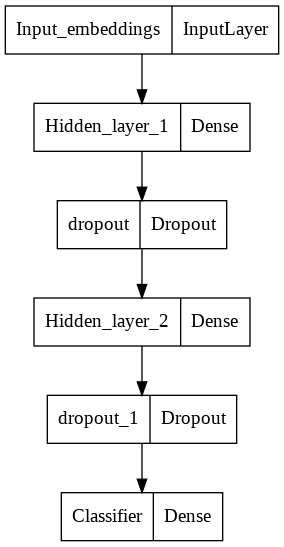

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)


# steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
# num_train_steps = steps_per_epoch * EPOCHS
# num_warmup_steps = int(0.1*num_train_steps)

# init_lr = 3e-5
# optimizer = optimization.create_optimizer(init_lr=init_lr,
#                                           num_train_steps=num_train_steps,
#                                           num_warmup_steps=num_warmup_steps,
#                                           optimizer_type='adamw')

model.compile(optimizer="adam",
              loss=loss_fn,
              metrics=["accuracy"])

In [ ]:
model.fit(train_ds, epochs=EPOCHS)

Epoch 1/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.9424
Epoch 2/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3285 - accuracy: 0.9424
Epoch 3/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.9424
Epoch 4/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3242 - accuracy: 0.9424
Epoch 5/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.9424
Epoch 6/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.9424
Epoch 7/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.9424
Epoch 8/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.9424
Epoch 9/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.9424
Epoch 10/10
406/406 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.9424

In [ ]:
model.save('/content/drive/MyDrive/Sentiment Analysis/models/toxic-neural-network-updated')

In [ ]:
# Check saved model
saved_model = tf.keras.models.load_model("/content/drive/MyDrive/Sentiment Analysis/models/neural-network")
saved_model.evaluate(test_ds, verbose=2)

997/997 - 2s - loss: 0.0756 - accuracy: 0.9939 - 2s/epoch - 2ms/step


[0.0755876824259758, 0.9938563704490662]

In [ ]:
model.evaluate(test_ds, verbose=2)

102/102 - 0s - loss: 0.3061 - accuracy: 0.9433 - 281ms/epoch - 3ms/step


[0.3060600459575653, 0.9432973861694336]

## Metrics evaluation

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Sentiment Analysis/models/toxic-neural-network-updated")

In [ ]:
predictions = model.predict(X_test)

102/102 [==============================] - 0s 1ms/step


In [ ]:
from sklearn import metrics
predictions = np.where(predictions < 0.5, 0.0, 1.0)

print(metrics.multilabel_confusion_matrix(y_test, predictions))

[[[   0  184]
  [   0 3061]]

 [[2910   33]
  [ 264   38]]

 [[1161  416]
  [ 427 1241]]

 [[3164    0]
  [  81    0]]

 [[1266  399]
  [ 677  903]]

 [[2973    8]
  [ 251   13]]]


## Get predictions

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/Toxic Comment Classifier/clean_data/cleaned_test.csv")

In [ ]:
test_data.iloc[:1]

,Unnamed: 0,id,comment_text
0,0,00001cee341fdb12,yo bitch ja rule succesful ever hat sad mofuck...


In [ ]:
BERT_MODEL = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1'
PREPROCESS_MODEL = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)

In [ ]:
embedding = bert(preprocess(test_data.iloc[:1]["comment_text"].values))["pooled_output"]
model.predict(embedding)

1/1 [==============================] - 0s 92ms/step


array([[0.99754757, 0.48499593, 0.97471637, 0.06210459, 0.91732234,
        0.3294431 ]], dtype=float32)

1/1 [==============================] - 0s 80ms/step


array([[0.9854292 , 0.45899475, 0.9611281 , 0.05626694, 0.8616515 ,
        0.18356   ]], dtype=float32)

In [ ]:
y_true = [0.99292046, 0.5064073, 0.9571643, 0.23104352, 0.92484444, 0.6470409]
y_pred = model.predict(get_embedding(sentence))

loss_fn(y_true, y_pred).numpy()

1/1 [==============================] - 0s 26ms/step


0.5138931